In [1]:
import pandas as pd
import micom
from gurobipy import *
import numpy as np
from micom import load_pickle
from micom.media import minimal_medium
import random
from micom.workflows import workflow

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import cobra
# https://resendislab.github.io/micom/media.html

In [2]:
#Number of samples

In [3]:
n = 126

In [42]:
#  0.08955224, 0.3880597, 0.5149254  &  0.573913, 0.273913, 0.1521739

In [11]:
#Get random values for the abundances

In [4]:
x = [0]*n
y = [0]*n
z = [0]*n

In [5]:
for i in range(int(n/2)):
    x[i] = random.uniform(0.05, 0.13)
    y[i] = random.uniform(0.348, 0.428)
    z[i] = 1.0-x[i]-y[i]
    #print(x[i],y[i],z[i],x[i]+y[i]+z[i])


In [6]:
for i in range(int(n/2), n):
    x[i] = random.uniform(0.54, 0.61)
    y[i] = random.uniform(0.234, 0.314)
    z[i] = 1.0-x[i]-y[i]
    #print(x[i],y[i],z[i],x[i]+y[i]+z[i])


In [8]:
#Define each community with abundances (random numbers)

In [43]:
d = [0]*(n+2)
df = [0]*(n+2)

In [58]:
for i in range(n):
    d[i] = {'id': ['A', 'B', 'C'], 
     'file': ['../SBMLS/cobraA_May16_div50_NormalObj.xml', '../SBMLS/cobraB_May16_div50_NormalObj.xml','../SBMLS/cobraC_May12_div50_NormalObj.xml'],
     'abundance':[x[i], y[i], z[i]]
    }
    df[i]=pd.DataFrame(data=d[i])

In [45]:
#Load same reconstruccion but with abundances of day 6
d[n] = {'id': ['A', 'B', 'C'], 
     'file': ['../SBMLS/cobraA_May16_div50_NormalObj.xml', '../SBMLS/cobraB_May16_div50_NormalObj.xml','../SBMLS/cobraC_May12_div50_NormalObj.xml'],
     'abundance':[0.08955224, 0.3880597, 0.5149254]
    }
df[n] = pd.DataFrame(data=d[n])

In [46]:
#Load same reconstruccion but with abundances of day 6
d[n+1] = {'id': ['A', 'B', 'C'], 
     'file': ['../SBMLS/cobraA_May16_div50_NormalObj.xml', '../SBMLS/cobraB_May16_div50_NormalObj.xml','../SBMLS/cobraC_May12_div50_NormalObj.xml'],
     'abundance':[0.573913, 0.273913, 0.1521739]
    }
df[n+1] = pd.DataFrame(data=d[n+1])

In [14]:
#Make array to store communities

In [7]:
com = [0]*(n+2)

In [48]:
#Create new communities and save them as pickle

In [49]:
for i in range(len(com)):
    com[i] = micom.Community(df[i],solver="gurobi")
    print(i)

Academic license - for non-commercial use only - expires 2021-07-16
Using license file C:\Users\santi\gurobi\gurobi.lic



0



1



2



3



4



5



6



7



8



9



10



11



12



13



14



15



16



17



18



19



20



21



22



23



24



25



26



27



28



29



30



31



32



33



34



35



36



37



38



39



40



41



42



43



44



45



46



47



48



49



50



51



52



53



54



55



56



57



58



59



60



61



62



63


AttributeError: 'int' object has no attribute 'copy'

In [8]:
#for i in range(64,n):
#    com[i] = micom.Community(df[i],solver="gurobi")
#    print(i)

In [63]:
com[126] = micom.Community(df[126],solver="gurobi")
com[127] = micom.Community(df[127],solver="gurobi")

In [65]:
for i in range(len(com)):
    com[i].to_pickle("./models/community_scan_May31_"+str(i)+".pickle")    

In [19]:
#Load communities previosly made

In [9]:
for i in range(len(com)):
    com[i]=load_pickle("./models/community_scan_May31_"+str(i)+".pickle")
    print(i) 

Academic license - for non-commercial use only - expires 2021-07-16
Using license file C:\Users\santi\gurobi\gurobi.lic
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp6jgjpyc2.lp
Reading time = 0.17 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
0
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpac80a1kp.lp
Reading time = 0.11 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
1
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp1w_yohgf.lp
Reading time = 0.17 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
2
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpwmbg562f.lp
Reading time = 0.18 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
3
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpdwvoet7n.lp
Reading time = 0.13 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
4
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmphyu3c2nx.lp
Reading time = 0.16 seconds
: 3200 rows,

52
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpnixzg6gv.lp
Reading time = 0.11 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
53
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpdy08l9fh.lp
Reading time = 0.11 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
54
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpy97mxz8u.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
55
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpl1djf9zf.lp
Reading time = 0.13 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
56
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpvq5_1sq_.lp
Reading time = 0.15 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
57
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpi_umx1r4.lp
Reading time = 0.22 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
58
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpwopsacx7.lp

Reading time = 0.13 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
106
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmprev3w2o5.lp
Reading time = 0.16 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
107
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpgpi5l7cg.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
108
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp0x_yczt9.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
109
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmphdtd7wnf.lp
Reading time = 0.13 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
110
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpms0j4oj7.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
111
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpwaibrgn7.lp
Reading time = 0.20 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
112
Re

In [13]:
x={}
for i,c in enumerate(com):
    x[str(i)]='com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4))
x

{'0': 'com_0.106_0.3694_0.5245',
 '1': 'com_0.0576_0.4062_0.5362',
 '2': 'com_0.0933_0.3883_0.5184',
 '3': 'com_0.1149_0.4093_0.4758',
 '4': 'com_0.0533_0.4236_0.5231',
 '5': 'com_0.1035_0.3746_0.5219',
 '6': 'com_0.0787_0.4004_0.5209',
 '7': 'com_0.0623_0.3762_0.5615',
 '8': 'com_0.1022_0.401_0.4968',
 '9': 'com_0.1181_0.3732_0.5088',
 '10': 'com_0.0776_0.4198_0.5026',
 '11': 'com_0.0923_0.379_0.5287',
 '12': 'com_0.1271_0.4034_0.4695',
 '13': 'com_0.1086_0.3604_0.531',
 '14': 'com_0.0956_0.3546_0.5498',
 '15': 'com_0.0575_0.4194_0.5231',
 '16': 'com_0.0604_0.4034_0.5362',
 '17': 'com_0.1184_0.3511_0.5305',
 '18': 'com_0.079_0.3996_0.5214',
 '19': 'com_0.069_0.3973_0.5337',
 '20': 'com_0.053_0.403_0.544',
 '21': 'com_0.1082_0.4051_0.4867',
 '22': 'com_0.0579_0.4034_0.5387',
 '23': 'com_0.1235_0.3773_0.4993',
 '24': 'com_0.0799_0.3567_0.5634',
 '25': 'com_0.0652_0.3865_0.5484',
 '26': 'com_0.0522_0.4125_0.5354',
 '27': 'com_0.1203_0.3573_0.5224',
 '28': 'com_0.0743_0.4116_0.5141',
 '29

In [ ]:
#Generate data for some images (based on the codes used to generate figures of the micom paper)

In [66]:
dt = {'sample':[],'run_accession':[],'subset':[],'type':[],'status':[]}
dt_sp = {'samples':[],'name':[],'reads':[],'relative':[],'genus':[]}
for i,c in enumerate(com):
    dt['sample'].append(i)
    dt_sp['samples'].append('com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4)))
    dt_sp['samples'].append('com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4)))
    dt_sp['samples'].append('com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4)))
    
    dt['run_accession'].append('com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4)))
    dt_sp['name'].append('A')
    dt_sp['name'].append('B')
    dt_sp['name'].append('C')
    
    dt['subset'].append('MCF7')
    dt_sp['reads'].append(1)
    dt_sp['reads'].append(1)
    dt_sp['reads'].append(1)
    
    dt['type'].append('spheroid_syn')
    dt_sp['relative'].append(c.abundances['A'])
    dt_sp['relative'].append(c.abundances['B'])
    dt_sp['relative'].append(c.abundances['C'])
    
    dt['status'].append('OK')
    dt_sp['genus'].append('A')
    dt_sp['genus'].append('B')
    dt_sp['genus'].append('C')
dtfm = pd.DataFrame(data=dt)
dtfm_sp = pd.DataFrame(data=dt_sp)
dtfm_sp

,samples,name,reads,relative,genus
0,com_0.106_0.3694_0.5245,A,1,0.106035,A
1,com_0.106_0.3694_0.5245,B,1,0.369444,B
2,com_0.106_0.3694_0.5245,C,1,0.524521,C
3,com_0.0576_0.4062_0.5362,A,1,0.057575,A
4,com_0.0576_0.4062_0.5362,B,1,0.406203,B
...,...,...,...,...,...
379,com_0.0902_0.391_0.5188,B,1,0.390977,B
380,com_0.0902_0.391_0.5188,C,1,0.518797,C
381,com_0.5739_0.2739_0.1522,A,1,0.573913,A
382,com_0.5739_0.2739_0.1522,B,1,0.273913,B


In [67]:
dtfm.to_csv("./data/Recent_scan_31.csv",index=False)
dtfm_sp.to_csv("./data/species_reduc_scan_31.csv",index=False)

In [24]:
#Solve for each community so we can compare the reactions' fluxes

In [68]:
sol = [0]*(n+2)

In [69]:
#Obtain optimization with tradeoff=0.5 (day 6)
for i in range(len(sol)):
    sol[i] = com[i].cooperative_tradeoff(fraction=0.5, fluxes=True)
    print(i,end=', ')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 

In [70]:
for s in sol:
    print(s.growth_rate,'\n', s.members, end='\n\n\n')

0.02788927975616124 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.106035     0.006992       1431         1166
B              0.369444     0.024366        872          713
C              0.524521     0.034596       1462         1193
medium              NaN          NaN        124          124


0.027889279756158063 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.057575     0.003521       1431         1166
B              0.406203     0.024851        872          713
C              0.536222     0.032807       1462         1193
medium              NaN          NaN        124          124


0.0278892797561412 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.093333     0.006078       1431         1166
B              

medium              NaN          NaN        124          124


0.027889279756156495 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.120289     0.008082       1431         1166
B              0.357347     0.024012        872          713
C              0.522364     0.035103       1462         1193
medium              NaN          NaN        124          124


0.027889279756147453 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.074343     0.004720       1431         1166
B              0.411573     0.026134        872          713
C              0.514084     0.032645       1462         1193
medium              NaN          NaN        124          124


0.027889279756154663 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A         

medium              NaN          NaN        124          124


0.02788927975615858 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.104441     0.006999       1431         1166
B              0.401940     0.026938        872          713
C              0.493619     0.033084       1462         1193
medium              NaN          NaN        124          124


0.027889279756155533 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.101884     0.006826       1431         1166
B              0.413712     0.027722        872          713
C              0.484404     0.032462       1462         1193
medium              NaN          NaN        124          124


0.027889279756155107 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A          

               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.550039     0.037652       1431         1166
B              0.267746     0.018327        872          713
C              0.182215     0.012472       1462         1193
medium              NaN          NaN        124          124


0.027889279756159378 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.554496     0.037276       1431         1166
B              0.286679     0.019270        872          713
C              0.158825     0.010676       1462         1193
medium              NaN          NaN        124          124


0.027889279756148796 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.549906     0.037197       1431         1166
B              0.290697     0.0196

In [71]:
#Generate some 4D figures related to abundances and fluxes

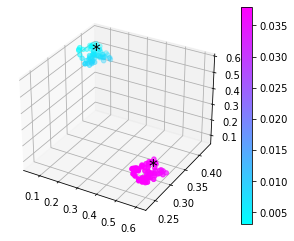

In [72]:
#Abundances and growth rate of A

#%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    c[i] = sol[i].members.growth_rate['A']

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')
plt.savefig("./figures/ab_agr.png", dpi=300)
plt.show()

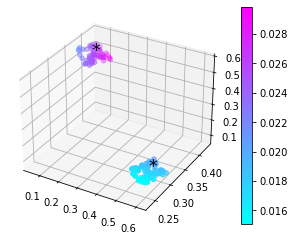

In [73]:
#Abundances and growth rate of B

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].members.growth_rate['B']

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

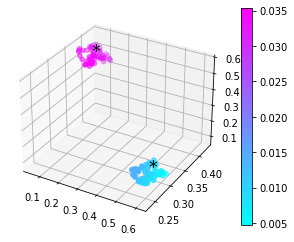

In [74]:
#Abundances and growth rate of C

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].members.growth_rate['C']

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

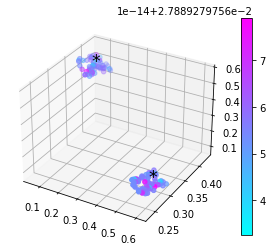

In [75]:
#Abundances and growth rate of the whole community

#%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    c[i] = sol[i].growth_rate

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

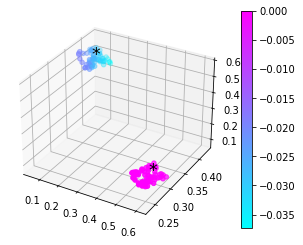

In [76]:
#Abundances and flux of exchange pyruvate

#%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    c[i] = sol[i].fluxes['EX_pyr_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

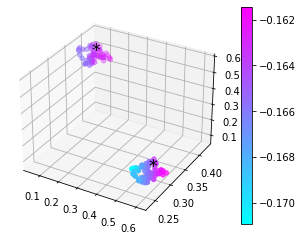

In [77]:
#Abundances and exchange oxygen

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_o2_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

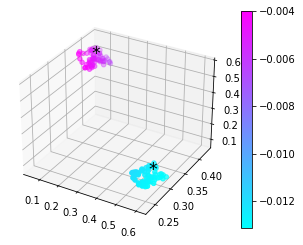

In [78]:
#Abundances and exchange alanine

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_ala_L_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

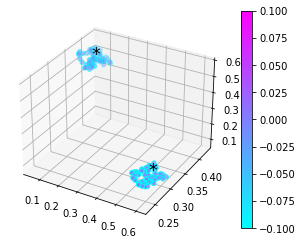

In [79]:
#Abundances and exchange lactate D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_lac_D_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

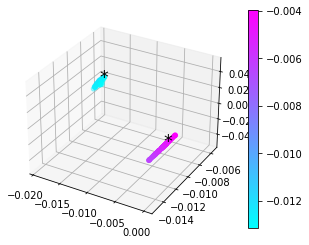

In [80]:
#Individual alanine exchanges and general exchange alanine

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_ala_L_b']['A']
    y[i] = sol[i].fluxes['EX_ala_L_b']['B']
    z[i] = sol[i].fluxes['EX_ala_L_b']['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_ala_L_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(sol[126].fluxes['EX_ala_L_b']['A'], sol[126].fluxes['EX_ala_L_b']['B'], sol[126].fluxes['EX_ala_L_b']['C'], "*", color='black', size='xx-large')
ax.text(sol[127].fluxes['EX_ala_L_b']['A'], sol[127].fluxes['EX_ala_L_b']['B'], sol[127].fluxes['EX_ala_L_b']['C'], "*", color='black', size='xx-large')

plt.show()

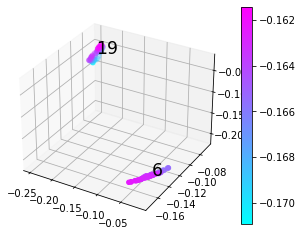

In [81]:
#Individual oxygen exchanges and general exchange oxygen

#%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_o2_b']['A']
    y[i] = sol[i].fluxes['EX_o2_b']['B']
    z[i] = sol[i].fluxes['EX_o2_b']['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_o2_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(sol[126].fluxes['EX_o2_b']['A'], sol[126].fluxes['EX_o2_b']['B'], sol[126].fluxes['EX_o2_b']['C'], "6", color='black', size='xx-large')
ax.text(sol[127].fluxes['EX_o2_b']['A'], sol[127].fluxes['EX_o2_b']['B'], sol[127].fluxes['EX_o2_b']['C'], "19", color='black', size='xx-large')

plt.show()

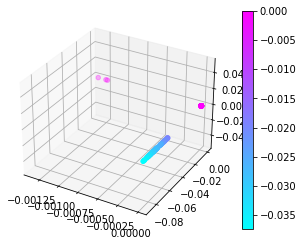

In [82]:
#Individual pyruvate exchanges and general exchange pyruvate

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_pyr_b']['A']
    y[i] = sol[i].fluxes['EX_pyr_b']['B']
    z[i] = sol[i].fluxes['EX_pyr_b']['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_pyr_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)
plt.show()

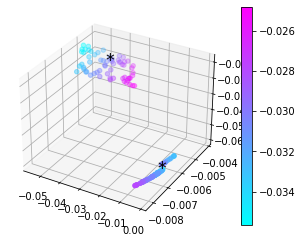

In [83]:
#Individual galactose exchanges and general exchange galactose

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_gal_b']['A']
    y[i] = sol[i].fluxes['EX_gal_b']['B']
    z[i] = sol[i].fluxes['EX_gal_b']['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_gal_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(sol[126].fluxes['EX_gal_b']['A'], sol[126].fluxes['EX_gal_b']['B'], sol[126].fluxes['EX_gal_b']['C'], "*", color='black', size='xx-large')
ax.text(sol[127].fluxes['EX_gal_b']['A'], sol[127].fluxes['EX_gal_b']['B'], sol[127].fluxes['EX_gal_b']['C'], "*", color='black', size='xx-large')

plt.show()

In [ ]:
'''{'3HCO3_NAt': 1,
 'ATPS4m': 1,
 'CYOOm3': 1,
 'CYOR_u10m': 1,
 'EX_hco3_LPAREN_e_RPAREN_': 1,
 'EX_hco3_b': 1,
 'EX_leu_L_LPAREN_e_RPAREN_': 1,
 'EX_leu_L_b': 1,
 'EX_nh4_LPAREN_e_RPAREN_': 1,
 'EX_nh4_b': 1,
 'EX_o2_LPAREN_e_RPAREN_': 1,
 'EX_o2_b': 1,
 'EX_ser_L_LPAREN_e_RPAREN_': 1,
 'EX_ser_L_b': 1,
 'G3PD1': 1,
 'GLUB0AT3tc': 1,
 'O2t': 1,
 'O2tm': 1,
 'TKT1': 1,
 'TKT2': 1,
 'r0838': 1}'''
plt.close()

In [ ]:
#semi phase plane

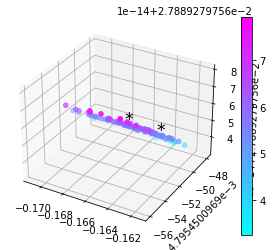

In [85]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_o2_m'].medium
    y[i] = sol[i].fluxes['EX_chol_m'].medium
    z[i] = sol[i].growth_rate
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].growth_rate

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(sol[126].fluxes['EX_o2_m'].medium, sol[126].fluxes['EX_chol_m'].medium, sol[126].growth_rate, "*", color='black', size='xx-large')
ax.text(sol[127].fluxes['EX_o2_m'].medium, sol[127].fluxes['EX_chol_m'].medium, sol[127].growth_rate, "*", color='black', size='xx-large')

plt.show()

In [42]:
#Obtain mean and other statistics of fluxes

In [86]:
solt = sol.copy()

for s in solt:
    s.fluxes = s.fluxes.fillna(0)

In [87]:
import statistics as st
for r in solt[0].fluxes:
    if 'EX_' in r:
        print(r)
        try:
            print(np.mean([s.fluxes[r]['A'] for s in solt]), np.mean([s.fluxes[r]['B'] for s in solt]), np.mean([s.fluxes[r]['C'] for s in solt]))
            print(st.pvariance([s.fluxes[r]['A'] for s in solt]), st.pvariance([s.fluxes[r]['B'] for s in solt]), st.pvariance([s.fluxes[r]['C'] for s in solt]))
            print(st.pstdev([s.fluxes[r]['A'] for s in solt]), st.pstdev([s.fluxes[r]['B'] for s in solt]), st.pstdev([s.fluxes[r]['C'] for s in solt]), end='\n\n')
        except:
            print('error',end='\n\n\n')

EX_2hb_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_2hb_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_2hb_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_2mcit_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_2mcit_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_2mcit_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_34hpp_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_34hpp_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_34hpp_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_3aib_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_3aib_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_3aib_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4abut_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4abut_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4abut_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4mop_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4mop_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4mop_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4mptnl_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4mptnl_

0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_creat_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cys_L_LPAREN_e_RPAREN_
-0.0010137913594344236 -0.0010100203197809829 -0.0010140267801343964
5.282694120872534e-07 4.137037899278079e-08 2.999069188674835e-07
0.0007268214444327117 0.00020339709681502533 0.0005476375798532123

EX_cys_L_b
-0.0010137913594344236 -0.0010100203197809829 -0.0010140267801343964
5.282694120872534e-07 4.137037899278079e-08 2.999069188674835e-07
0.0007268214444327117 0.00020339709681502533 0.0005476375798532123

EX_cys_L_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_dag_hs_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_dag_hs_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_dag_hs_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_datp_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_datp_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_dcmp_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_dcmp_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_dcmp_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_dgtp_b
0.

-0.001910941321731943 -0.005643053303600123 -0.0005076557166226501
3.2426725345402804e-06 2.7702710514185356e-05 7.516682351609616e-08
0.0018007422176814427 0.005263336443187472 0.000274165686248473

EX_inost_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_lac_D_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_lac_D_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_lac_D_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_lac_L_LPAREN_e_RPAREN_
0.0 -3.0692227507825826e-06 2.018380163909516e-06
0.0 1.196356293328018e-09 5.173800277300525e-10
0.0 3.458838379178793e-05 2.2745989266902693e-05

EX_lac_L_b
0.0 -3.0692227507825826e-06 2.018380163909516e-06
0.0 1.196356293328018e-09 5.173800277300525e-10
0.0 3.458838379178793e-05 2.2745989266902693e-05

EX_lac_L_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_leu_L_LPAREN_e_RPAREN_
-0.017232569185669327 -0.017058880999161988 -0.019261481494411002
0.0001986278036944981 2.9534363299266703e-05 0.00015733698818312916
0.014093537657185228 0.0054345527230184 0.0125434041

0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ribflv_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ribflv_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ribflv_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ser_L_LPAREN_e_RPAREN_
-0.015506489765866526 -0.014674952234324176 -0.02445210908673609
0.00013921388504647156 1.5466218820923635e-05 0.00017438948086307828
0.011798893382282575 0.003932711382865978 0.013205660940031675

EX_ser_L_b
-0.015506489765866526 -0.014674952234324176 -0.02445210908673609
0.00013921388504647156 1.5466218820923635e-05 0.00017438948086307828
0.011798893382282575 0.003932711382865978 0.013205660940031675

EX_ser_L_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_sfcys_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_slfcys_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_slfcys_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_so4_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_so4_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_so4_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_spc

In [88]:
#PCA of fluxes by population (A, B and C)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [89]:
A_d = {}
B_d = {}
C_d = {}
m_d = {}
for r in solt[0].fluxes:
    try:
        A_d[r]=[s.fluxes[r]['A'] for s in sol]
    except:
        A_d[r]=[0]*len(sol)
        
    try: 
        B_d[r]=[s.fluxes[r]['B'] for s in sol]
    except:
        B_d[r]=[0]*len(sol)
        
    try:
        C_d[r]=[s.fluxes[r]['C'] for s in sol]
    except:
        C_d[r]=[0]*len(sol)
        
    try:
        m_d[r]=[s.fluxes[r]['medium'] for s in sol]
    except:
        m_d[r]=[0]*len(sol)

IndexError: list index out of range

In [90]:
dfA = pd.DataFrame(data=A_d)
dfB = pd.DataFrame(data=B_d)
dfC = pd.DataFrame(data=C_d)
dfm = pd.DataFrame(data=m_d)

In [91]:
dfA = dfA.loc[:, (dfA != 0).any(axis=0)]
dfB = dfB.loc[:, (dfB != 0).any(axis=0)]
dfC = dfC.loc[:, (dfC != 0).any(axis=0)]
dfm = dfm.loc[:, (dfm != 0).any(axis=0)]

In [92]:
dfA

,3DSPHR,3HCO3_NAt,4MOPt2im,AACOAT,ACACT1r,ACACT1rm,ACACtx,ACCOACm,ACt2r,ADK1,...,r1380,r1457,r1464,r2084,r2099,r2104,r2108,r2114,r2136,xmpt
0,0.000000,-0.009657,0.000000,0.000000,0.000000,0.000856,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000122,0.0,0.000000,0.0,0.0,0.0,0.000000,0.008136,0.000322
1,0.000000,-0.004863,0.000000,0.000000,0.000000,0.000431,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000062,0.0,0.000000,0.0,0.0,0.0,0.000000,0.004097,0.000162
2,0.000000,-0.008394,0.000000,0.000000,0.000000,0.000744,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000106,0.0,0.000000,0.0,0.0,0.0,0.000000,0.007072,0.000280
3,0.000000,-0.010829,0.000000,0.000000,0.000000,0.000963,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000138,0.0,0.000000,0.0,0.0,0.0,0.000000,0.009153,0.000362
4,0.000000,-0.004602,0.000000,0.000000,0.000000,0.000399,0.000000,0.000000,0.000000,0.002970,...,0.0,0.000057,0.0,0.000000,0.0,0.0,0.0,0.000000,0.003792,0.000150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.000653,-0.120156,0.011151,0.008557,-0.008557,0.002808,-0.009389,0.185518,-0.000832,0.000000,...,0.0,0.000000,0.0,0.000832,0.0,0.0,0.0,0.000832,0.046935,-0.000439
124,0.000661,-0.114742,0.010844,0.007999,-0.007999,0.002557,-0.008777,0.173422,-0.000778,0.022820,...,0.0,0.000000,0.0,0.000778,0.0,0.0,0.0,0.000778,0.047271,-0.000278
125,0.000658,-0.115371,0.009613,0.008033,-0.008033,0.003668,-0.008678,0.173215,-0.000645,0.022787,...,0.0,0.000000,0.0,0.000645,0.0,0.0,0.0,0.000645,0.047065,-0.000283
126,0.000000,-0.008078,0.000000,0.000000,0.000000,0.000716,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000102,0.0,0.000000,0.0,0.0,0.0,0.000000,0.006805,0.000269


In [93]:
#PCA for A

In [94]:
scaler = StandardScaler()
scaler.fit(dfA)
pcaA = scaler.transform(dfA)

In [95]:
pca = PCA(n_components=4) # estimate only 2 PCs
pcaA_new = pca.fit_transform(pcaA)

In [96]:
#for i,c in enumerate(dfA.columns):
#    if "EX_pyr" in c:
#        print(i,c)

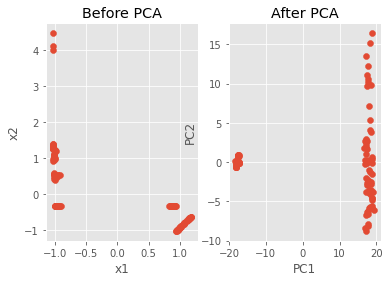

In [97]:
# O2 vs pyr exchange
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcaA[:,141], pcaA[:,154])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcaA_new[:,0], pcaA_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [98]:
pd.DataFrame(
    data    = pca.components_,
    columns = dfA.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,3DSPHR,3HCO3_NAt,4MOPt2im,AACOAT,ACACT1r,ACACT1rm,ACACtx,ACCOACm,ACt2r,ADK1,...,r1380,r1457,r1464,r2084,r2099,r2104,r2108,r2114,r2136,xmpt
PC1,0.055834,-0.055819,0.051176,0.055435,-0.055435,0.031492,-0.054263,0.055852,-0.042679,0.038804,...,-0.014383,-0.051766,-0.013701,0.044757,0.008889,0.009370,-0.009370,0.042679,0.055729,-0.054573
PC2,0.004207,0.006852,0.078665,0.012756,-0.012756,-0.151525,0.034069,-0.003053,-0.103967,0.055894,...,-0.055772,0.002966,-0.144023,0.115211,0.037408,-0.028583,0.028583,0.103967,0.005035,0.021086
PC3,-0.000794,0.000916,0.006741,0.006485,-0.006485,-0.001161,0.017503,-0.001614,-0.030958,-0.151307,...,-0.043084,0.010846,-0.061925,0.035429,0.013999,-0.098829,0.098829,0.030958,0.001128,0.007773
PC4,0.000794,0.008674,0.049822,0.010235,-0.010235,-0.115631,0.006069,0.004816,-0.034769,0.051785,...,-0.040095,-0.107848,-0.055867,0.065032,0.080047,-0.023772,0.023772,0.034769,-0.019881,-0.060681


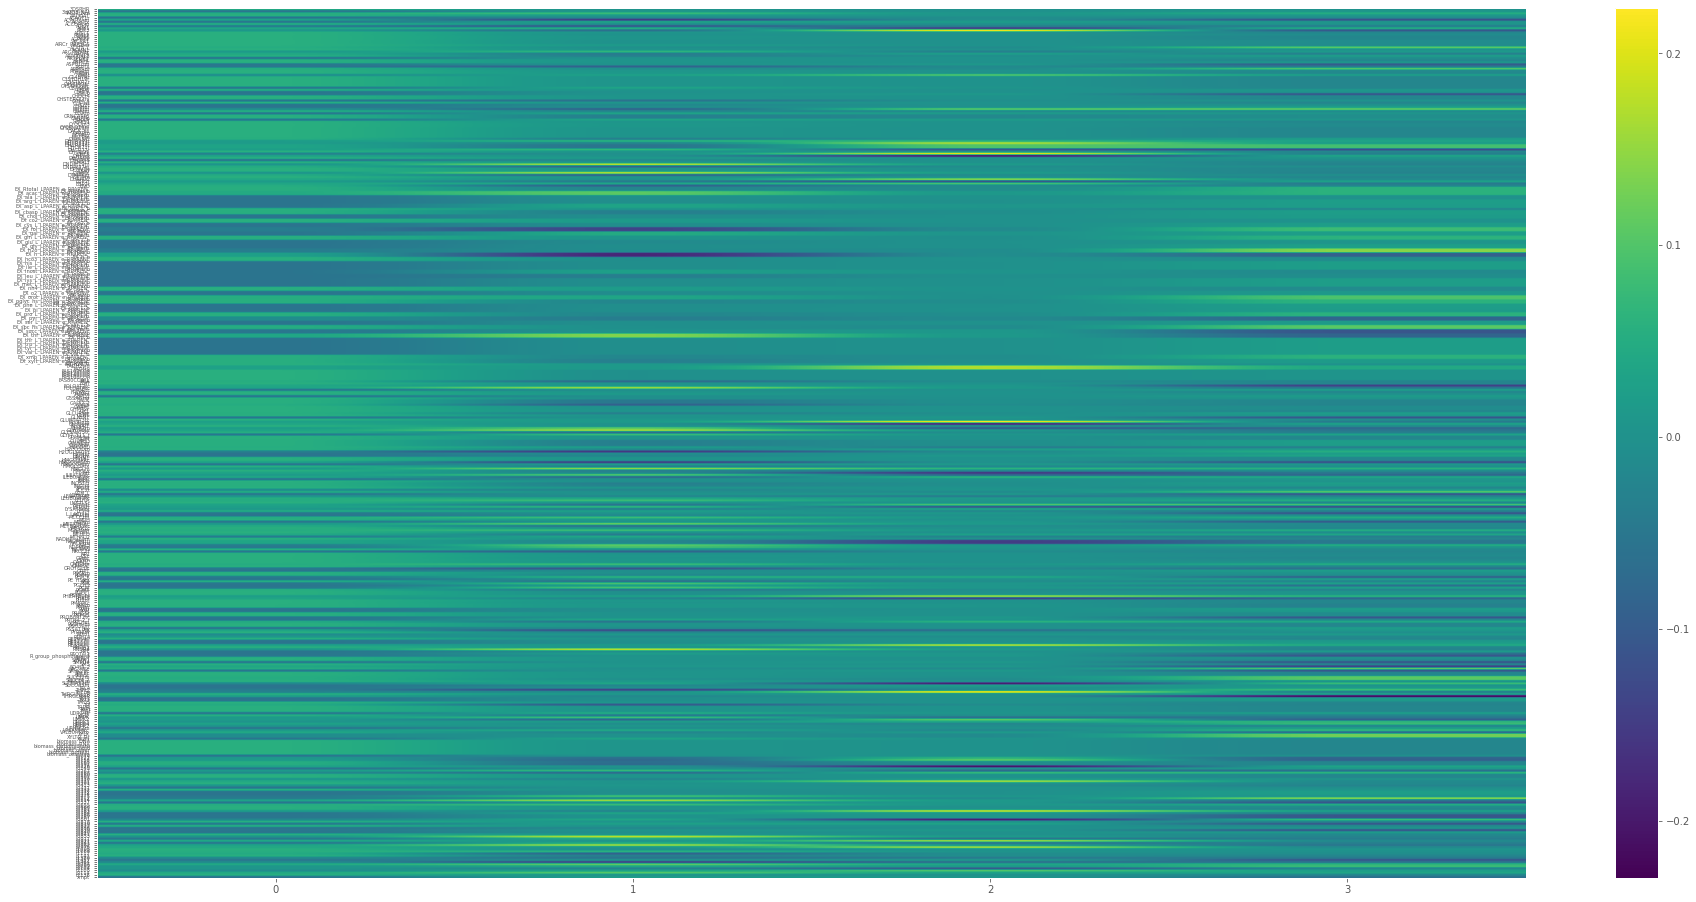

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfA.columns)), dfA.columns)
plt.xticks(np.arange(pca.n_components_) , np.arange(pca.n_components_) )
plt.grid(False)
ax.tick_params(axis='y',labelsize=5)
plt.colorbar();

In [100]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.78329428 0.04514832 0.026646   0.01649116]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.78329428 0.8284426  0.8550886  0.87157976]


In [101]:
print(max(pca.components_[0]),min(pca.components_[0]))

print(max(pca.components_[1]),min(pca.components_[1]))

print(max(pca.components_[2]),min(pca.components_[2]))

print(max(pca.components_[3]),min(pca.components_[3]))

0.055851904800976876 -0.05585425742438016
0.17626402833399957 -0.1807094633078295
0.22365755684089916 -0.20977391364867762
0.1416057152705434 -0.22974872556685755


In [109]:
nums_a = {}
for i,p in enumerate(pca.components_[0]):
    if abs(p)>0.0558:
        print(i, p)
        nums_a[i]=1

0 0.05583410083727598
1 -0.05581858949412849
7 0.05585190480097685
12 0.05583726275286583
15 0.055837262752865824
16 0.05583726275286583
19 0.0558341008372761
23 -0.05585055134552023
25 0.0558274517617049
38 0.05582745176170491
39 -0.05585425742438016
88 -0.05583410083727609
89 -0.05583410083727609
117 0.0558194593857818
118 0.0558194593857818
170 0.05585190480097685
171 0.05585190480097685
172 0.05585190480097685
173 0.05585190480097685
174 0.05585190480097685
183 0.055851904800976834
187 0.05583726275286586
188 0.05583354598525492
191 0.0558274517617049
196 0.05583726275286586
221 -0.05583726275286586
222 0.05585190480097685
246 0.05583726275286586
260 0.05582705899819603
265 0.055851904800976834
274 0.05585190480097686
275 0.05585190480097686
284 0.05583726275286586
285 0.05583726275286586
297 -0.05581462117673065
305 0.055834100837276114
351 -0.055851904800976834
366 -0.055851904800976876
367 0.055851904800976876
375 0.05583726275286586
384 0.05580469444559931
395 0.055851904800976

In [110]:
a_var={}
for i,r in enumerate(dfA.columns):
    if i in nums_a:
        print(r, end='  ')
        a_var[r]=1

3DSPHR  3HCO3_NAt  ACCOACm  ADSL2  AICART  AIRCr_PRASCS  ALAtN1  ARTPLM3  ASPCTr  CBPS  CDIPTr  EX_ala_L_LPAREN_e_RPAREN_  EX_ala_L_b  EX_hco3_LPAREN_e_RPAREN_  EX_hco3_b  FAS100COA  FAS120COA  FAS140COA  FAS160COA  FAS80COA_L  G5SADrm  GARFT  GHMT2r  GLNS  GLUPRT  IMPC  IMPD  MTHFC  OAADC  P5CRm  PGPPT  PGPP_hs  PRAGSr  PRFGS  RE3273C  SERPT  r0074  r0431  r0432  r0666  r0822  r1005  

In [111]:
mi=1000
for i in abs(pca.components_[0]):
    if i!=0 and i<mi:
        mi = i
        
print(mi)

mi2=1000
for i in abs(pca.components_[1]):
    if i!=0 and i<mi2:
        mi2 = i
        
print(mi2)

mi3=1000
for i in abs(pca.components_[2]):
    if i!=0 and i<mi3:
        mi3 = i
        
print(mi3)

mi4=1000
for i in abs(pca.components_[3]):
    if i!=0 and i<mi4:
        mi4 = i
        
print(mi4)

0.003636344828325516
2.3278385458950884e-05
5.8907036414708505e-05
0.00017296417909228756


In [114]:
numss_a = {}
ex = 5
for i,p in enumerate(pca.components_[0]):
    if abs(p)<(mi*ex):
        print(i, p)
        numss_a[i]=1

10 0.008606459574729173
20 0.01661676992715983
31 -0.009370333905421144
47 -0.004597152958666798
73 0.0036363448283255185
77 0.003636344828325516
81 0.01799524316692556
145 -0.008888612733259634
146 -0.008888612733259634
216 0.01370091842125308
219 0.017851071716898856
226 -0.013820055182982953
229 0.00704223461347825
235 0.012517483542725362
242 0.013549109402834922
294 -0.010940554060727234
295 0.010940554060727234
301 0.003636344828325517
333 0.01581774375941268
334 0.0174670828737364
335 0.005107101621272764
337 0.004810515433267965
339 0.016594325671026217
341 -0.008815644875710951
342 -0.008815644875710951
352 0.011556381654033141
353 0.0174670828737364
358 0.016008891256497987
359 -0.016008891256497987
362 0.007481062947781164
365 0.004810515433267965
389 0.0036363448283263655
399 -0.014383399959454793
401 -0.01370091842125308
403 0.008888612733259634
404 0.009370333905421148
405 -0.009370333905421148


In [115]:
a_nvar={}
for i,r in enumerate(dfA.columns):
    if i in numss_a:
        print(r, end='  ')
        a_nvar[r]=1

ADK3  ARGATB0tc  BHBt  CO2tm  DNDPt19m  DTMPK  EBP1r  EX_pyr_LPAREN_e_RPAREN_  EX_pyr_b  HMGLm  ILEATB0tc  KCC2t  LEUATB0tc  LYSATB0tc  METATB0tc  RDH1  RDH1a  RNDR4  UMPK  UMPK2  UMPK3  UMPK7  VALATB0tc  XYLK  XYLTD_Dr  r0122  r0153  r0267  r0268  r0330  r0413  r0853  r1380  r1464  r2099  r2104  r2108  

In [116]:
#Intersect between var and non-var reac
for i in a_nvar.keys():
    if i in a_var:
        print(i)

In [72]:
#PCA for B

In [117]:
scaler = StandardScaler()
scaler.fit(dfB)
pcaB = scaler.transform(dfB)

pca = PCA(n_components=4) # estimate only 2 PCs
pcaB_new = pca.fit_transform(pcaB)

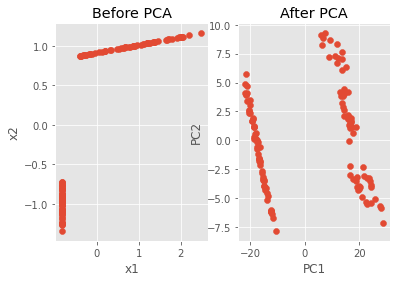

In [118]:
# O2 vs pyr exchange
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcaB[:,146], pcaB[:,160])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcaB_new[:,0], pcaB_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()


In [119]:
pd.DataFrame(
    data    = pca.components_,
    columns = dfB.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,3DSPHR,3HCO3_NAt,AACOAT,ACACT1r,ACACtx,ACCOACm,ACt2m,ACt2r,ADK1,ADK3,...,r1144,r1291,r1380,r1455,r1456,r2002,r2136,r2400,r2404,xmpt
PC1,0.056375,-0.056962,0.056354,-0.056354,-0.056354,0.056354,0.047755,0.047755,-0.015515,0.013341,...,0.051455,0.054840,-0.009313,-0.046653,-0.046653,0.048465,0.056574,-0.016038,-0.016038,-0.054493
PC2,-0.027173,-0.010243,0.034300,-0.034300,-0.034300,0.034300,0.100257,0.100257,0.016138,-0.054229,...,-0.023373,0.057886,0.016746,-0.057509,-0.057509,0.025448,-0.027923,-0.011048,-0.011048,-0.065597
PC3,-0.011073,-0.003294,0.009802,-0.009802,-0.009802,0.009802,0.054847,0.054847,-0.093780,0.080667,...,-0.022956,0.000348,-0.054595,-0.015122,-0.015122,-0.004271,-0.009192,-0.001491,-0.001491,-0.019359
PC4,0.006421,-0.000030,-0.008783,0.008783,0.008783,-0.008783,-0.096156,-0.096156,-0.187304,0.194574,...,-0.102007,0.035382,0.028374,0.009416,0.009416,0.008254,0.003805,-0.010312,-0.010312,0.015035


In [120]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.80258395 0.04654602 0.02459268 0.02117444]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.80258395 0.84912997 0.87372265 0.89489709]


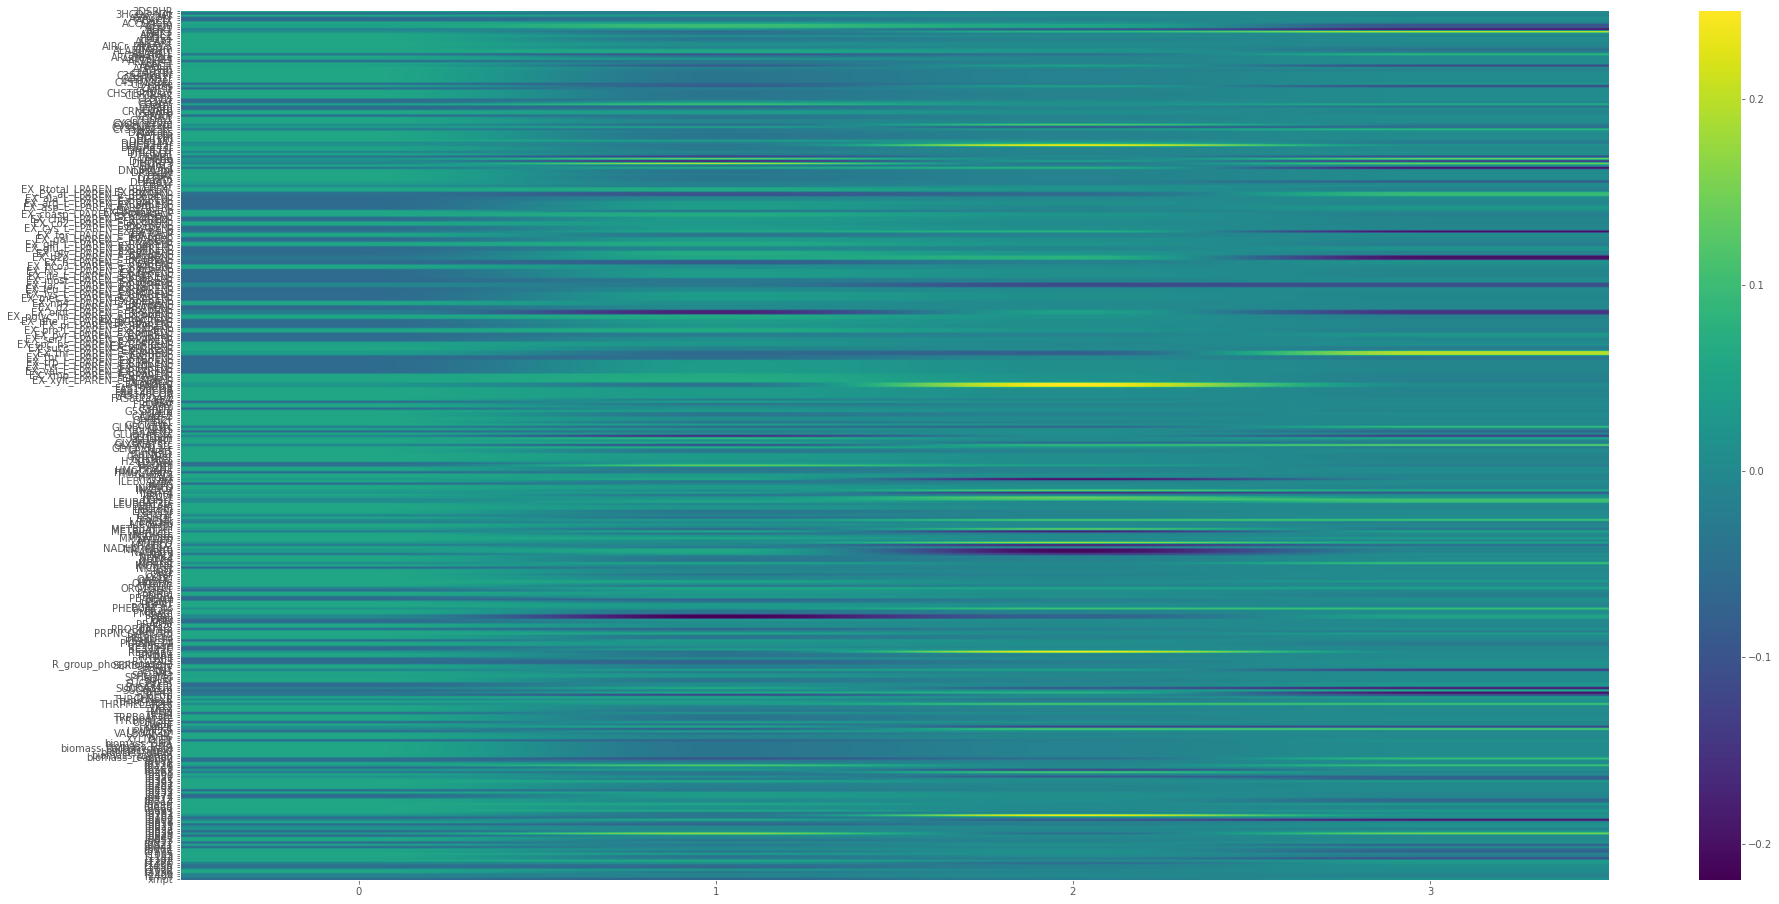

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfB.columns)), dfB.columns)
plt.xticks(np.arange(pca.n_components_) , np.arange(pca.n_components_) )
plt.grid(False)
ax.tick_params(axis='y',labelsize=10)
plt.colorbar();


In [122]:
print(max(pca.components_[0]),min(pca.components_[0]))

print(max(pca.components_[1]),min(pca.components_[1]))

print(max(pca.components_[2]),min(pca.components_[2]))

print(max(pca.components_[3]),min(pca.components_[3]))

0.057033197415025653 -0.05702845934593664
0.19457165744896612 -0.21949138859909345
0.247910773548008 -0.2115637429445793
0.19774166002921226 -0.1977416600292123


In [131]:
nums_b={}
for i,p in enumerate(pca.components_[0]):
    if abs(p)>0.0568:
        print(i, p)
        nums_b[i]=1

1 -0.05696163699258452
11 0.05695743384554121
14 0.05695743384554123
15 0.05695743384554123
16 0.05680709279269847
25 0.056918396348550185
34 -0.05680880652254938
48 0.056987496411266395
49 0.0569874964112664
82 -0.057019093624446716
83 -0.057019093624446716
104 -0.05690984386959905
105 -0.05690984386959905
112 0.05696163699258461
113 0.05696163699258461
122 -0.05702320354935891
123 -0.05702320354935891
128 0.0569882030630963
129 0.0569882030630963
130 -0.057023296473668245
131 -0.057023296473668245
144 -0.05690195004288303
145 -0.05690195004288303
148 0.056807092792698466
149 0.056807092792698466
171 0.0568245947493992
174 0.057033197415025653
175 -0.05682459474939922
179 0.05695743384554124
180 0.05697600387939326
186 0.05696437283659951
189 0.05695743384554126
208 -0.05695743384554124
217 0.057022177910684084
227 0.057033197415025653
233 0.05695743384554127
244 0.05701128968539271
245 -0.056829006443891064
246 0.05701128968539271
247 0.057023296473668245
249 0.05698749641126641
250 

In [132]:
b_var={}
for i,r in enumerate(dfB.columns):
    if i in nums_b:
        print(r, end='  ')
        b_var[r]=1

3HCO3_NAt  ADSL2  AICART  AIRCr_PRASCS  AKGDm  ATPS4m  CDIPTr  CYOOm3  CYOR_u10m  EX_ala_L_LPAREN_e_RPAREN_  EX_ala_L_b  EX_glu_L_LPAREN_e_RPAREN_  EX_glu_L_b  EX_hco3_LPAREN_e_RPAREN_  EX_hco3_b  EX_leu_L_LPAREN_e_RPAREN_  EX_leu_L_b  EX_nh4_LPAREN_e_RPAREN_  EX_nh4_b  EX_o2_LPAREN_e_RPAREN_  EX_o2_b  EX_ser_L_LPAREN_e_RPAREN_  EX_ser_L_b  EX_succ_LPAREN_e_RPAREN_  EX_succ_b  FBA  FUMm  G3PD1  GARFT  GHMT2r  GLUB0AT3tc  GLUPRT  IMPC  LEUB0AT3tc  MDH  MTHFC  NICRNS  NKCC2t  NP1  O2t  O2tm  OAADC  PPM  PRAGSr  PRFGS  PROtm  RE3273C  RPE  SUCCt4_2  TKT1  TKT2  TPI  XYLK  XYLTD_Dr  r0191  r0249  r0391  r0407  r0408  r0666  r0838  r0840  r0841  r0911  r0941  

In [133]:
mi=min(abs(pca.components_[0]))
print(mi)

mi2=min(abs(pca.components_[1]))
print(mi2)

mi3=min(abs(pca.components_[2]))
print(mi3)

mi4=min(abs(pca.components_[3]))
print(mi4)

0.0019018828570827313
3.5200610638578644e-05
0.0002858304074428294
3.0392650647741885e-05


In [135]:
numss_b={}
ex = 10
for i,p in enumerate(pca.components_[0]):
    if abs(p)<(mi*ex):
        print(i, p)
        numss_b[i]=1

8 -0.015515261237332585
9 0.013341137867175553
50 0.015414957701472444
58 0.00949865494309999
62 -0.007010863915570678
66 0.009081084751619723
67 -0.009081084751619726
77 0.005274157915876599
120 -0.0033660218018440754
121 -0.0033660218018440754
187 -0.003335427820357762
191 -0.011499996609989606
215 0.0033660218018440754
216 0.005168760009953013
222 -0.0070108639155706766
224 0.0033660218018440754
225 -0.012796523653086362
243 0.0051885450610654705
254 -0.016005801598995156
266 -0.0019018828570827313
267 -0.0019018828570827313
290 -0.01534774134335865
298 -0.01560597659672848
303 0.005832001055478224
305 0.0033660218018440754
316 0.0022559931795851276
356 -0.01560597659672848
359 0.012796523653086362
375 -0.00931302727326152
380 -0.016037679906003962
381 -0.016037679906003962


In [136]:
b_nvar={}
for i,r in enumerate(dfB.columns):
    if i in numss_b:
        print(r, end='  ')
        b_nvar[r]=1

ADK1  ADK3  CYSB0AT3tc  DHCR241r  DHCR72r  DHORD9  DHORTS  EBP2r  EX_lac_L_LPAREN_e_RPAREN_  EX_lac_L_b  GLUDxm  GLYSNAT5tc  LDH_L  LEUB0AT2tc  LSTO2r  L_LACt4r  MALtm  NH4t3r  OROTGLUt  PPAm  PPItm  SERtN1  SUCOAS1m  THRGLNexR  THRPHELAT2tc  UMPK4  r0801  r0821  r1380  r2400  r2404  

In [137]:
#Intersect between var and non-var reac
for i in b_nvar.keys():
    if i in b_var:
        print(i)

In [138]:
#PCA for C

In [139]:
scaler = StandardScaler()
scaler.fit(dfC)
pcaC = scaler.transform(dfC)

pca = PCA(n_components=4) # estimate only 2 PCs
pcaC_new = pca.fit_transform(pcaC)

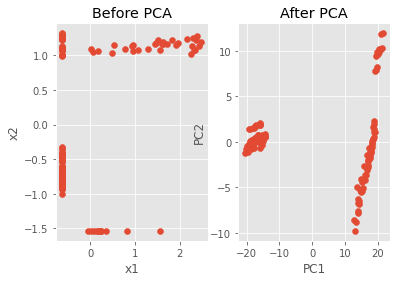

In [140]:
# O2 vs pyr exchange
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcaC[:,123], pcaC[:,131])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcaC_new[:,0], pcaC_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [141]:
pd.DataFrame(
    data    = pca.components_,
    columns = dfC.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,3DSPHR,3HBCOAHLm,3HCO3_NAt,3MOBt2im,3MOPt2im,AACOAT,ACACT10m,ACACT1r,ACACt2,ACCOACm,...,r1143,r1384,r1464,r1993,r2010,r2136,r2473,r2521,r2526,r2534
PC1,-0.057250,0.044856,0.057001,0.035658,0.036292,-0.057250,0.048960,0.057250,0.052249,-0.057250,...,-0.057031,-0.050866,0.057124,-0.057250,-0.045327,-0.057250,-0.004641,0.004641,-0.057250,-0.057250
PC2,-0.014540,-0.150518,-0.007608,-0.107943,-0.153203,-0.014540,-0.125287,0.014540,-0.096675,-0.014540,...,-0.012955,0.106831,-0.020896,-0.014540,0.001471,-0.014540,0.007427,-0.007427,-0.014540,-0.014540
PC3,0.006356,0.023398,-0.036606,0.014489,0.024839,0.006356,0.017324,-0.006356,0.012264,0.006356,...,-0.028451,-0.013795,-0.000525,0.006356,-0.097817,0.006356,-0.044073,0.044073,0.006356,0.006356
PC4,0.002235,-0.011998,-0.001942,-0.016077,-0.005422,0.002235,-0.009645,-0.002235,-0.008226,0.002235,...,0.004946,0.009036,-0.004222,0.002235,0.059109,0.002235,-0.117439,0.117439,0.002235,0.002235


In [142]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.839391   0.0443506  0.02321975 0.0152862 ]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.839391   0.8837416  0.90696135 0.92224755]


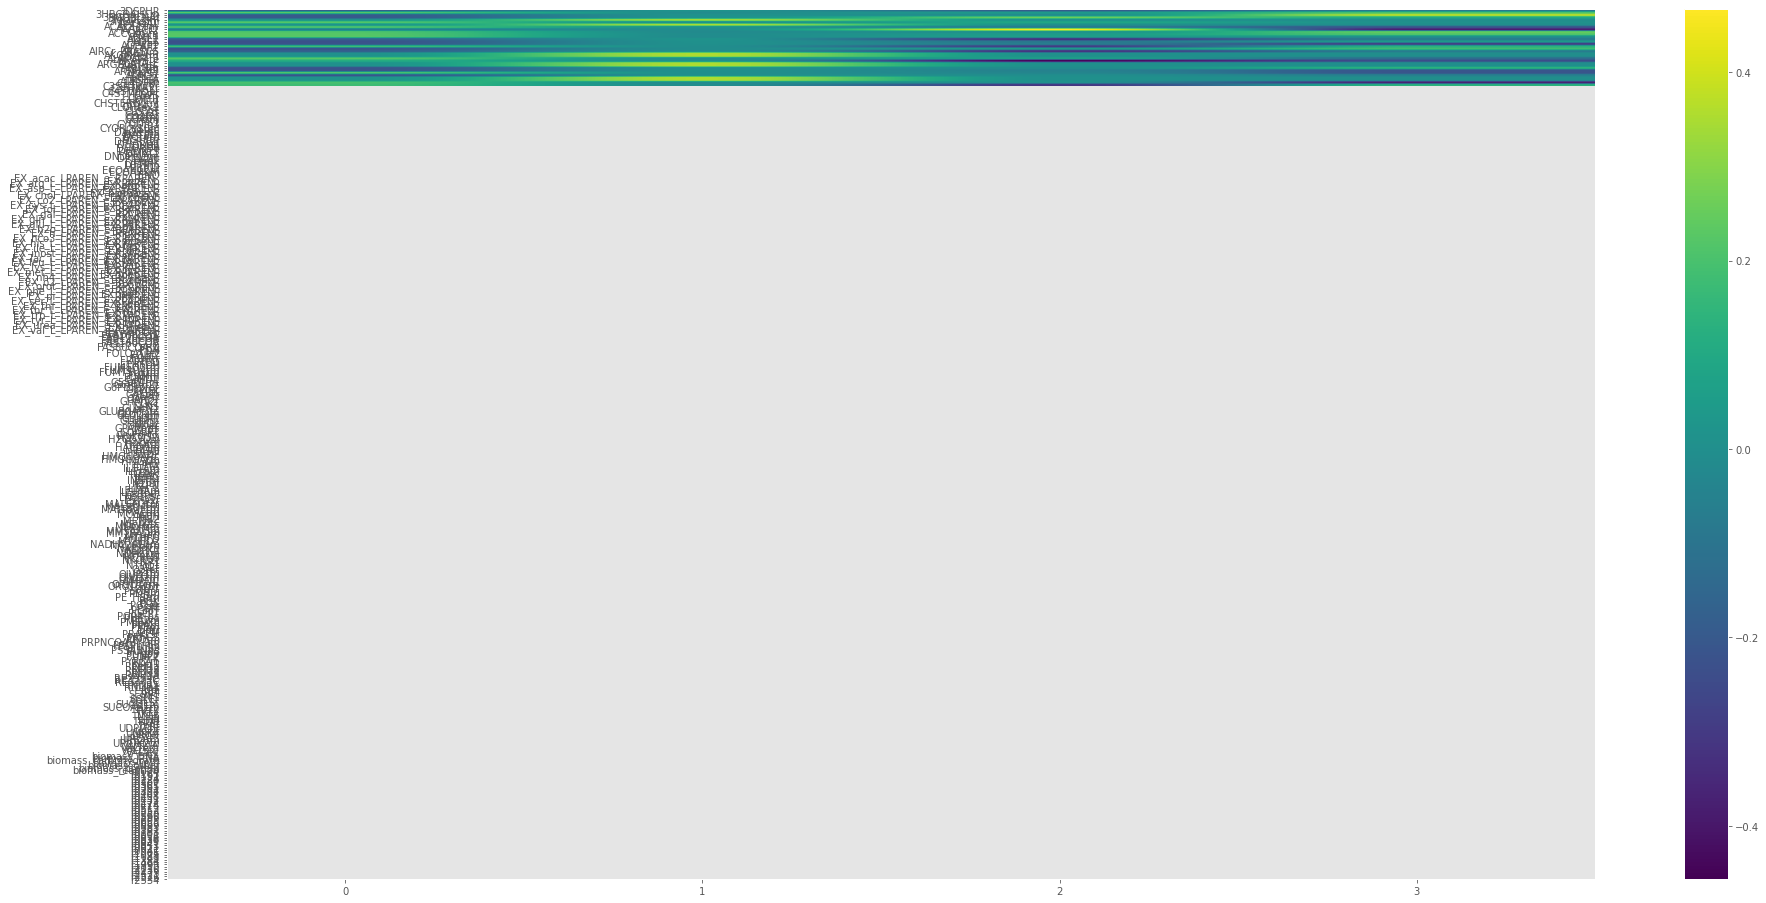

In [180]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfC.columns)), dfC.columns)
plt.xticks(np.arange(pca.n_components_) , np.arange(pca.n_components_) )
plt.grid(False)
ax.tick_params(axis='y',labelsize=10)
plt.colorbar();

In [143]:
print(max(pca.components_[0]),min(pca.components_[0]))

print(max(pca.components_[1]),min(pca.components_[1]))

print(max(pca.components_[2]),min(pca.components_[2]))

print(max(pca.components_[3]),min(pca.components_[3]))

0.057356325038507516 -0.057356325038507516
0.17658695516570752 -0.16332102602440088
0.28992086631811925 -0.32315138541003113
0.3004322349966045 -0.3011551473039475


In [159]:
nums_c={}
for i,p in enumerate(pca.components_[0]):
    if abs(p)>0.05725:
        print(i, p)
        nums_c[i]=1     

0 -0.057250303686293504
5 -0.05725030368629345
7 0.05725030368629342
9 -0.05725030368629341
10 -0.05729766992896836
11 -0.05725030368629343
12 -0.05725030368629341
13 -0.05725030368629341
14 -0.05725030368629343
15 -0.05725030368629343
16 -0.05725030368629344
20 -0.05725030368629342
21 0.057250303686293455
25 0.0572503036862934
26 -0.057250303686293406
29 -0.057278711870007964
30 -0.057250303686293455
31 -0.057250303686293455
32 -0.05725030368629342
33 -0.05725030368629344
34 -0.05725030368629345
36 0.05725030368629342
37 -0.057250303686293455
38 -0.05725030368629347
41 -0.057250303686293434
45 -0.05725030368629348
46 -0.05725030368629341
47 -0.057272366150636654
48 -0.05727236615063663
49 -0.05725030368629345
50 -0.057250303686293434
51 -0.05725030368629344
52 -0.0572503036862934
53 -0.05725030368629342
54 -0.05725030368629346
55 -0.05725030368629343
59 -0.05725030368629347
60 -0.05725030368629343
61 -0.05725030368629345
62 -0.05725030368629344
63 -0.057250303686293434
64 -0.057250303

In [160]:
c_var={}
for i,r in enumerate(dfC.columns):
    if i in nums_c:
        print(r,end='  ')
        c_var[r]=1

3DSPHR  AACOAT  ACACT1r  ACCOACm  ADK3  ADSL1  ADSL2  ADSS  AGPAT1  AICART  AIRCr_PRASCS  ALAPAT4te  ALATA_L  ARTPLM3  ASNS1  ATPS4m  C14STRr  C3STDH1Pr  C3STKR2r  C4STMO1r  C4STMO2Pr  CDIPTr  CHOLtu  CHSTEROLtrc  CLS_hs  COAtm  CTPS1  CYOOm3  CYOR_u10m  CYStec  DAGK_hs  DATPtn  DCTPtn  DGTPtn  DHCR72r  DHCRD1  DMATT  DNDPt19m  DPMVDc  DSAT  DTMPK  DTTPtn  EBP1r  EX_biomass_c  EX_chol_LPAREN_e_RPAREN_  EX_chol_b  EX_cys_L_LPAREN_e_RPAREN_  EX_cys_L_b  EX_inost_LPAREN_e_RPAREN_  EX_inost_b  EX_leu_L_LPAREN_e_RPAREN_  EX_leu_L_b  EX_lys_L_LPAREN_e_RPAREN_  EX_lys_L_b  EX_met_L_LPAREN_e_RPAREN_  EX_met_L_b  EX_o2_LPAREN_e_RPAREN_  EX_o2_b  EX_phe_L_LPAREN_e_RPAREN_  EX_phe_L_b  EX_pi_LPAREN_e_RPAREN_  EX_pi_b  EX_ser_L_LPAREN_e_RPAREN_  EX_ser_L_b  EX_thr_L_LPAREN_e_RPAREN_  EX_thr_L_b  EX_trp_L_LPAREN_e_RPAREN_  EX_trp_L_b  EX_tyr_L_LPAREN_e_RPAREN_  EX_tyr_L_b  FAS100COA  FAS120COA  FAS140COA  FAS160COA  FAS80COA_L  FDH  FORtr  FRDPtcr  G3PD1  G5SADrm  GARFT  GHMT2r  GK1  GLUDym  GLUPRT

In [161]:
mi=min(abs(pca.components_[0]))
print(mi)

mi2=min(abs(pca.components_[1]))
print(mi2)

mi3=min(abs(pca.components_[2]))
print(mi3)

mi4=min(abs(pca.components_[3]))
print(mi4)

0.004641022771033588
0.00011392161644244853
1.8905879462108742e-06
6.356302418651507e-05


In [162]:
numss_c = {}
ex = 10
for i,p in enumerate(pca.components_[0]):
    if abs(p)<(mi*ex):
        print(i, p)
        numss_c[i]=1

1 0.04485594897386883
3 0.035658476935894017
4 0.03629189663982633
23 -0.03993709982772021
24 -0.0399370998277202
28 0.029281526399440906
44 0.030098770795504687
56 0.014346839777510674
66 0.0448559489738686
82 0.035984014664481104
83 0.035984014664481104
92 0.020007995229233508
93 0.020007995229233508
102 -0.005985753479135209
103 -0.005985753479135209
122 -0.03598401466448039
123 -0.03598401466448039
130 -0.03993709982772019
131 -0.03993709982772019
132 0.04247044128163725
133 0.04247044128163725
148 0.046213463701137034
149 0.012629221411689444
150 0.006021682035740876
182 0.0448559489738686
189 0.03629189663982633
190 0.0236456885306039
191 0.0236456885306039
198 0.005985753479135209
204 0.005985753479135209
205 -0.046213463701137034
206 -0.012629221411689444
207 -0.006021682035740876
210 -0.029281526399440913
215 0.0448559489738686
217 0.0448559489738686
220 -0.008407707842051334
222 0.012989193166781696
223 0.012989193166781696
226 0.04360644045241433
235 0.0448559489738686
238 -

In [163]:
c_nvar={}
for i,r in enumerate(dfC.columns):
    if i in numss_c:
        print(r, end='  ')
        c_nvar[r]=1

3HBCOAHLm  3MOBt2im  3MOPt2im  ARGNm  ARGtm  ASPTA  CO2tm  DHFR  ECOAH12m  EX_fol_LPAREN_e_RPAREN_  EX_fol_b  EX_h_LPAREN_e_RPAREN_  EX_h_b  EX_lac_L_LPAREN_e_RPAREN_  EX_lac_L_b  EX_thf_LPAREN_e_RPAREN_  EX_thf_b  EX_urea_LPAREN_e_RPAREN_  EX_urea_b  EX_val_L_LPAREN_e_RPAREN_  EX_val_L_b  FUMSO3tm  FUMSO4tm  FUMTSULtm  HIBDm  ILETA  ILETAm  ILEt5m  LDH_L  L_LACt2r  MALSO3tm  MALSO4tm  MALTSULtm  MDH  MMMm  MMTSADm  MTHFD2  NADPHtru  NADPtru  NH4t3r  OIVD2m  ORNTArm  OROTGLUt  PGI  PROtm  RDH1  RDH1a  RDH2  RDH2a  RDH3  RDH3a  THFt2  UREAt5  UREAtm  VALTA  VALTAm  VALt5m  VALtec  r0074  r0224  r0512  r0552  r0553  r0560  r0911  r2010  r2473  r2521  

In [164]:
#Intersect between var and non-var reac
for i in c_nvar.keys():
    if i in c_var:
        print(i)

In [165]:
#PCA medium

In [181]:
scaler = StandardScaler()
scaler.fit(dfm)
pcam = scaler.transform(dfm)

pca = PCA(n_components=4) # estimate only 2 PCs
pcam_new = pca.fit_transform(pcam)

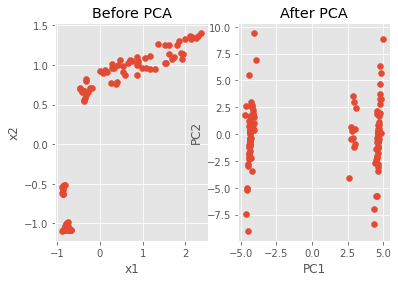

In [182]:
# O2 vs pyr exchange
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcam[:,12], pcam[:,13])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcam_new[:,0], pcam_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [183]:
pd.DataFrame(
    data    = pca.components_,
    columns = dfm.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,EX_ac_m,EX_ala_L_m,EX_arg_L_m,EX_asp_L_m,EX_chol_m,EX_co2_m,EX_cys_L_m,EX_for_m,EX_gal_m,EX_glu_L_m,...,EX_phe_L_m,EX_pi_m,EX_pyr_m,EX_ser_L_m,EX_succ_m,EX_thr_L_m,EX_trp_L_m,EX_tyr_L_m,EX_urea_m,EX_val_L_m
PC1,-0.199102,0.224234,-0.196940,-0.198031,0.010558,0.226030,0.010566,0.216226,-0.070742,0.214915,...,0.010544,0.011310,-0.224785,-0.223803,0.220452,-0.227295,0.010563,0.010563,0.196940,0.180950
PC2,0.020547,-0.006491,0.014825,0.012147,0.353162,-0.008998,0.353161,0.007791,-0.005990,-0.014457,...,0.353163,0.353003,0.002179,0.006681,0.003195,0.005316,0.353162,0.353162,-0.014825,-0.004929
PC3,-0.198435,0.042003,-0.014114,0.262712,0.006795,0.092049,0.006773,-0.070749,0.466960,0.007342,...,0.006771,0.007069,-0.006377,-0.048470,-0.035108,-0.000170,0.006748,0.006774,0.014114,-0.312563
PC4,-0.093615,0.205110,0.375942,0.091480,0.001243,0.010018,0.001206,-0.215024,-0.381082,0.250033,...,0.001163,0.004840,0.144143,-0.213682,-0.211214,-0.052364,0.001175,0.001208,-0.375942,0.138241


In [184]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.59367323 0.24997207 0.10039718 0.02641301]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.59367323 0.8436453  0.94404248 0.97045549]


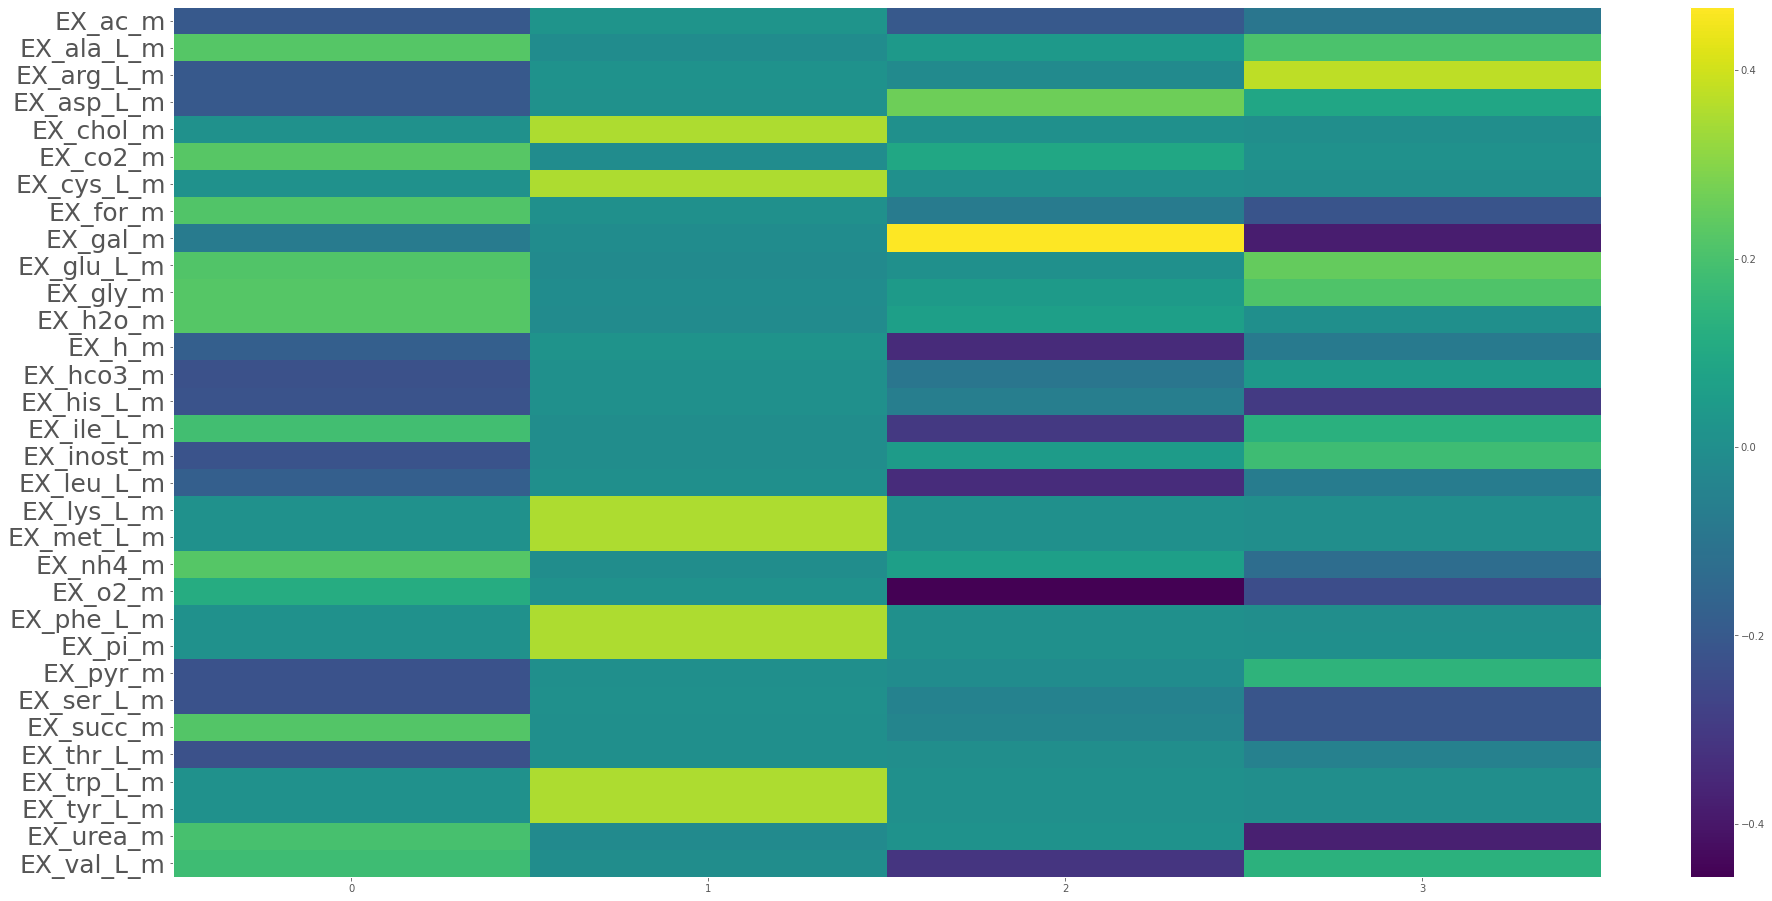

In [172]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfm.columns)), dfm.columns)
plt.xticks(np.arange(pca.n_components_) , np.arange(pca.n_components_) )
plt.grid(False)
ax.tick_params(axis='y',labelsize=25)
plt.colorbar();

In [214]:
print(max(pca.components_[0]),min(pca.components_[0]))

print(max(pca.components_[1]),min(pca.components_[1]))

print(max(pca.components_[2]),min(pca.components_[2]))

print(max(pca.components_[3]),min(pca.components_[3]))

0.2260295219469976 -0.22729497586807892
0.3531628874874421 -0.01482538599912268
0.46696010060218135 -0.45631319509624957
0.3759419024487298 -0.38108214617304054


In [221]:
nums_m={}
for i,p in enumerate(pca.components_[0]):
    if abs(p)>0.21:
        print(i, p)
        nums_m[i]=1


1 0.2242344376261391
5 0.2260295219469976
7 0.21622629153754705
9 0.2149145500352181
10 0.22380257232201006
11 0.2250271486675193
13 -0.22586818274109322
14 -0.2184501107980209
16 -0.22051186532524694
20 0.22456330824657403
24 -0.22478531861398784
25 -0.22380257232199896
26 0.22045222860668234
27 -0.22729497586807892


In [222]:
m_var={}
for i,r in enumerate(dfm.columns):
    if i in nums_m:
        print(r, end='  ')
        m_var[r]=1

EX_ala_L_m  EX_co2_m  EX_for_m  EX_glu_L_m  EX_gly_m  EX_h2o_m  EX_hco3_m  EX_his_L_m  EX_inost_m  EX_nh4_m  EX_pyr_m  EX_ser_L_m  EX_succ_m  EX_thr_L_m  

In [223]:
mi=min(abs(pca.components_[0]))
print(mi)

mi2=min(abs(pca.components_[1]))
print(mi2)

mi3=min(abs(pca.components_[2]))
print(mi3)

mi4=min(abs(pca.components_[3]))
print(mi4)

0.010544483961284958
0.0021793358202480163
0.00017007852691171477
0.0011628604966734339


In [227]:
numss_m={}
ex = 20
for i,p in enumerate(pca.components_[0]):
    if abs(p)<(mi*ex):
        print(i, p)
        numss_m[i]=1

0 -0.19910151241466878
2 -0.19694003808122332
3 -0.19803140929611798
4 0.010557925345272575
6 0.010565891905916268
8 -0.07074176712623576
12 -0.17695934039676497
15 0.18639534042146258
17 -0.1781421731786001
18 0.010562494571549818
19 0.01056059315392068
21 0.1158294784891541
22 0.010544483961284958
23 0.011310019087160918
28 0.010562887381077824
29 0.010562768505374256
30 0.19694003808123195
31 0.1809503533670792


In [228]:
m_nvar={}
for i,r in enumerate(dfm.columns):
    if i in numss_m:
        print(r,end='  ')
        m_nvar[r]=1

EX_ac_m  EX_arg_L_m  EX_asp_L_m  EX_chol_m  EX_cys_L_m  EX_gal_m  EX_h_m  EX_ile_L_m  EX_leu_L_m  EX_lys_L_m  EX_met_L_m  EX_o2_m  EX_phe_L_m  EX_pi_m  EX_trp_L_m  EX_tyr_L_m  EX_urea_m  EX_val_L_m  

In [229]:
#Intersect between var and non-var reac
for i in m_nvar.keys():
    if i in m_var:
        print(i)

In [111]:
#Shared between populations

In [230]:
all_var={}
for r in a_var.keys():
    if r in b_var or r in c_var:
        all_var[r]=1
        
for r in b_var.keys():
    if r in a_var or r in c_var:
        all_var[r]=1
        
for r in c_var.keys():
    if r in b_var or r in a_var:
        all_var[r]=1
        
all_var

{'3DSPHR': 1,
 '3HCO3_NAt': 1,
 'ACCOACm': 1,
 'ADSL2': 1,
 'AICART': 1,
 'AIRCr_PRASCS': 1,
 'ARTPLM3': 1,
 'CDIPTr': 1,
 'EX_ala_L_LPAREN_e_RPAREN_': 1,
 'EX_ala_L_b': 1,
 'EX_hco3_LPAREN_e_RPAREN_': 1,
 'EX_hco3_b': 1,
 'FAS100COA': 1,
 'FAS120COA': 1,
 'FAS140COA': 1,
 'FAS160COA': 1,
 'FAS80COA_L': 1,
 'G5SADrm': 1,
 'GARFT': 1,
 'GHMT2r': 1,
 'GLUPRT': 1,
 'IMPC': 1,
 'MTHFC': 1,
 'OAADC': 1,
 'P5CRm': 1,
 'PGPPT': 1,
 'PGPP_hs': 1,
 'PRAGSr': 1,
 'PRFGS': 1,
 'RE3273C': 1,
 'SERPT': 1,
 'r0431': 1,
 'r0432': 1,
 'r0666': 1,
 'r1005': 1,
 'ATPS4m': 1,
 'CYOOm3': 1,
 'CYOR_u10m': 1,
 'EX_leu_L_LPAREN_e_RPAREN_': 1,
 'EX_leu_L_b': 1,
 'EX_o2_LPAREN_e_RPAREN_': 1,
 'EX_o2_b': 1,
 'EX_ser_L_LPAREN_e_RPAREN_': 1,
 'EX_ser_L_b': 1,
 'G3PD1': 1,
 'NKCC2t': 1,
 'O2t': 1,
 'O2tm': 1,
 'PPM': 1,
 'r0838': 1}

In [231]:
all_nvar={}
for r in a_nvar.keys():
    if r in b_nvar or r in c_nvar:
        all_nvar[r]=1
        
for r in b_nvar.keys():
    if r in a_nvar or r in c_nvar:
        all_nvar[r]=1
        
for r in c_nvar.keys():
    if r in b_nvar or r in a_nvar:
        all_nvar[r]=1
        
all_nvar

{'ADK3': 1,
 'CO2tm': 1,
 'RDH1': 1,
 'RDH1a': 1,
 'r1380': 1,
 'EX_lac_L_LPAREN_e_RPAREN_': 1,
 'EX_lac_L_b': 1,
 'LDH_L': 1,
 'NH4t3r': 1,
 'OROTGLUt': 1}

In [232]:
a_only_var={}
a_only_nvar={}

for r in a_var.keys():
    if r not in b_var and r not in c_var:
        a_only_var[r]=1
print(a_only_var)

for r in a_nvar.keys():
    if r not in b_nvar and r not in c_nvar:
        a_only_nvar[r]=1
a_only_nvar

{'ALAtN1': 1, 'ASPCTr': 1, 'CBPS': 1, 'GLNS': 1, 'IMPD': 1, 'r0074': 1, 'r0822': 1}


{'ARGATB0tc': 1,
 'BHBt': 1,
 'DNDPt19m': 1,
 'DTMPK': 1,
 'EBP1r': 1,
 'EX_pyr_LPAREN_e_RPAREN_': 1,
 'EX_pyr_b': 1,
 'HMGLm': 1,
 'ILEATB0tc': 1,
 'KCC2t': 1,
 'LEUATB0tc': 1,
 'LYSATB0tc': 1,
 'METATB0tc': 1,
 'RNDR4': 1,
 'UMPK': 1,
 'UMPK2': 1,
 'UMPK3': 1,
 'UMPK7': 1,
 'VALATB0tc': 1,
 'XYLK': 1,
 'XYLTD_Dr': 1,
 'r0122': 1,
 'r0153': 1,
 'r0267': 1,
 'r0268': 1,
 'r0330': 1,
 'r0413': 1,
 'r0853': 1,
 'r1464': 1,
 'r2099': 1,
 'r2104': 1,
 'r2108': 1}

In [233]:
b_only_var={}
b_only_nvar={}

for r in b_var.keys():
    if r not in a_var and r not in c_var:
        b_only_var[r]=1
print(b_only_var)

for r in b_nvar.keys():
    if r not in a_nvar and r not in c_nvar:
        b_only_nvar[r]=1
b_only_nvar

{'AKGDm': 1, 'EX_glu_L_LPAREN_e_RPAREN_': 1, 'EX_glu_L_b': 1, 'EX_nh4_LPAREN_e_RPAREN_': 1, 'EX_nh4_b': 1, 'EX_succ_LPAREN_e_RPAREN_': 1, 'EX_succ_b': 1, 'FBA': 1, 'FUMm': 1, 'GLUB0AT3tc': 1, 'LEUB0AT3tc': 1, 'MDH': 1, 'NICRNS': 1, 'NP1': 1, 'PROtm': 1, 'RPE': 1, 'SUCCt4_2': 1, 'TKT1': 1, 'TKT2': 1, 'TPI': 1, 'XYLK': 1, 'XYLTD_Dr': 1, 'r0191': 1, 'r0249': 1, 'r0391': 1, 'r0407': 1, 'r0408': 1, 'r0840': 1, 'r0841': 1, 'r0911': 1, 'r0941': 1}


{'ADK1': 1,
 'CYSB0AT3tc': 1,
 'DHCR241r': 1,
 'DHCR72r': 1,
 'DHORD9': 1,
 'DHORTS': 1,
 'EBP2r': 1,
 'GLUDxm': 1,
 'GLYSNAT5tc': 1,
 'LEUB0AT2tc': 1,
 'LSTO2r': 1,
 'L_LACt4r': 1,
 'MALtm': 1,
 'PPAm': 1,
 'PPItm': 1,
 'SERtN1': 1,
 'SUCOAS1m': 1,
 'THRGLNexR': 1,
 'THRPHELAT2tc': 1,
 'UMPK4': 1,
 'r0801': 1,
 'r0821': 1,
 'r2400': 1,
 'r2404': 1}

In [234]:
c_only_var={}
c_only_nvar={}

for r in c_var.keys():
    if r not in b_var and r not in a_var:
        c_only_var[r]=1
print(c_only_var)

for r in c_nvar.keys():
    if r not in b_nvar and r not in a_nvar:
        c_only_nvar[r]=1
c_only_nvar

{'AACOAT': 1, 'ACACT1r': 1, 'ADK3': 1, 'ADSL1': 1, 'ADSS': 1, 'AGPAT1': 1, 'ALAPAT4te': 1, 'ALATA_L': 1, 'ASNS1': 1, 'C14STRr': 1, 'C3STDH1Pr': 1, 'C3STKR2r': 1, 'C4STMO1r': 1, 'C4STMO2Pr': 1, 'CHOLtu': 1, 'CHSTEROLtrc': 1, 'CLS_hs': 1, 'COAtm': 1, 'CTPS1': 1, 'CYStec': 1, 'DAGK_hs': 1, 'DATPtn': 1, 'DCTPtn': 1, 'DGTPtn': 1, 'DHCR72r': 1, 'DHCRD1': 1, 'DMATT': 1, 'DNDPt19m': 1, 'DPMVDc': 1, 'DSAT': 1, 'DTMPK': 1, 'DTTPtn': 1, 'EBP1r': 1, 'EX_biomass_c': 1, 'EX_chol_LPAREN_e_RPAREN_': 1, 'EX_chol_b': 1, 'EX_cys_L_LPAREN_e_RPAREN_': 1, 'EX_cys_L_b': 1, 'EX_inost_LPAREN_e_RPAREN_': 1, 'EX_inost_b': 1, 'EX_lys_L_LPAREN_e_RPAREN_': 1, 'EX_lys_L_b': 1, 'EX_met_L_LPAREN_e_RPAREN_': 1, 'EX_met_L_b': 1, 'EX_phe_L_LPAREN_e_RPAREN_': 1, 'EX_phe_L_b': 1, 'EX_pi_LPAREN_e_RPAREN_': 1, 'EX_pi_b': 1, 'EX_thr_L_LPAREN_e_RPAREN_': 1, 'EX_thr_L_b': 1, 'EX_trp_L_LPAREN_e_RPAREN_': 1, 'EX_trp_L_b': 1, 'EX_tyr_L_LPAREN_e_RPAREN_': 1, 'EX_tyr_L_b': 1, 'FDH': 1, 'FORtr': 1, 'FRDPtcr': 1, 'GK1': 1, 'GLUDym': 1

{'3HBCOAHLm': 1,
 '3MOBt2im': 1,
 '3MOPt2im': 1,
 'ARGNm': 1,
 'ARGtm': 1,
 'ASPTA': 1,
 'DHFR': 1,
 'ECOAH12m': 1,
 'EX_fol_LPAREN_e_RPAREN_': 1,
 'EX_fol_b': 1,
 'EX_h_LPAREN_e_RPAREN_': 1,
 'EX_h_b': 1,
 'EX_thf_LPAREN_e_RPAREN_': 1,
 'EX_thf_b': 1,
 'EX_urea_LPAREN_e_RPAREN_': 1,
 'EX_urea_b': 1,
 'EX_val_L_LPAREN_e_RPAREN_': 1,
 'EX_val_L_b': 1,
 'FUMSO3tm': 1,
 'FUMSO4tm': 1,
 'FUMTSULtm': 1,
 'HIBDm': 1,
 'ILETA': 1,
 'ILETAm': 1,
 'ILEt5m': 1,
 'L_LACt2r': 1,
 'MALSO3tm': 1,
 'MALSO4tm': 1,
 'MALTSULtm': 1,
 'MDH': 1,
 'MMMm': 1,
 'MMTSADm': 1,
 'MTHFD2': 1,
 'NADPHtru': 1,
 'NADPtru': 1,
 'OIVD2m': 1,
 'ORNTArm': 1,
 'PGI': 1,
 'PROtm': 1,
 'RDH2': 1,
 'RDH2a': 1,
 'RDH3': 1,
 'RDH3a': 1,
 'THFt2': 1,
 'UREAt5': 1,
 'UREAtm': 1,
 'VALTA': 1,
 'VALTAm': 1,
 'VALt5m': 1,
 'VALtec': 1,
 'r0074': 1,
 'r0224': 1,
 'r0512': 1,
 'r0552': 1,
 'r0553': 1,
 'r0560': 1,
 'r0911': 1,
 'r2010': 1,
 'r2473': 1,
 'r2521': 1}

In [117]:
#Get media and gcs

In [235]:
results=[]
def media_and_gcs(com, name):
    
    # Get growth rates
    sol = com.cooperative_tradeoff(fraction = 0.5, pfba = True, fluxes = True)
    rates = sol.members["growth_rate"].copy()
    rates["community"] = sol.growth_rate
    rates.name = name

    # Get the minimal medium
    med = minimal_medium(com, 0.95*sol.growth_rate, exports = True)
    med.name = name

    #Get fluxes
    com.medium = med[med > 0]
    fluxes = sol.fluxes
    fluxes["sample"] = name
    results.append({"medium": med, "gcs": rates, "fluxes":fluxes})

In [236]:
gcs = pd.DataFrame()
media = pd.DataFrame()
fluxes = pd.DataFrame()

In [237]:
#media_and_gcs(com_6,'D6')
#media_and_gcs(com_6_2,'D6_2')
for i,c in enumerate(com):
    temp='com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4))
    media_and_gcs(c,temp)
    print(i,' - ',temp)

0  -  com_0.106_0.3694_0.5245
1  -  com_0.0576_0.4062_0.5362
2  -  com_0.0933_0.3883_0.5184
3  -  com_0.1149_0.4093_0.4758
4  -  com_0.0533_0.4236_0.5231
5  -  com_0.1035_0.3746_0.5219
6  -  com_0.0787_0.4004_0.5209
7  -  com_0.0623_0.3762_0.5615
8  -  com_0.1022_0.401_0.4968
9  -  com_0.1181_0.3732_0.5088
10  -  com_0.0776_0.4198_0.5026
11  -  com_0.0923_0.379_0.5287
12  -  com_0.1271_0.4034_0.4695
13  -  com_0.1086_0.3604_0.531
14  -  com_0.0956_0.3546_0.5498
15  -  com_0.0575_0.4194_0.5231
16  -  com_0.0604_0.4034_0.5362
17  -  com_0.1184_0.3511_0.5305
18  -  com_0.079_0.3996_0.5214
19  -  com_0.069_0.3973_0.5337
20  -  com_0.053_0.403_0.544
21  -  com_0.1082_0.4051_0.4867
22  -  com_0.0579_0.4034_0.5387
23  -  com_0.1235_0.3773_0.4993
24  -  com_0.0799_0.3567_0.5634
25  -  com_0.0652_0.3865_0.5484
26  -  com_0.0522_0.4125_0.5354
27  -  com_0.1203_0.3573_0.5224
28  -  com_0.0743_0.4116_0.5141
29  -  com_0.1146_0.3683_0.5171
30  -  com_0.1066_0.3876_0.5057
31  -  com_0.113_0.4163_0.4

In [238]:
for s in results:
    gcs = gcs.append(s["gcs"])
    media = media.append(s["medium"])
    fluxes = fluxes.append(s["fluxes"])

In [239]:
gcs, media, fluxes

(                                 A         B         C  community  medium
 com_0.106_0.3694_0.5245   0.006992  0.024366  0.034596   0.027889     NaN
 com_0.0576_0.4062_0.5362  0.003521  0.024851  0.032807   0.027889     NaN
 com_0.0933_0.3883_0.5184  0.006078  0.025291  0.033763   0.027889     NaN
 com_0.1149_0.4093_0.4758  0.007866  0.028036  0.032596   0.027889     NaN
 com_0.0533_0.4236_0.5231  0.003259  0.025912  0.032000   0.027889     NaN
 ...                            ...       ...       ...        ...     ...
 com_0.5598_0.283_0.1572   0.037336  0.018871  0.010485   0.027889     NaN
 com_0.5989_0.2395_0.1616  0.037777  0.015107  0.010195   0.027889     NaN
 com_0.6057_0.2452_0.1492  0.037605  0.015220  0.009261   0.027889     NaN
 com_0.0902_0.391_0.5188   0.005849  0.025348  0.033637   0.027889     NaN
 com_0.5739_0.2739_0.1522  0.037436  0.017866  0.009925   0.027889     NaN
 
 [128 rows x 5 columns],
                           EX_arg_L_m  EX_chol_m  EX_co2_m  EX_cys_L_m  \

In [240]:
gcs.to_csv("./data/growth_rates_scan_31.csv")
media.to_csv("./data/minimal_media_scan_31.csv")
fluxes.to_csv("./data/minimal_fluxes_scan_31.csv.gz", compression = "gzip")

In [241]:
xx=media.fillna(0.0)

In [242]:
for r in xx:
    print(r, end=': ')
    av = np.mean(xx[r])
    print(av)
    for f in xx[r]:
        if f>av*1.05 or f<av*0.95:
            print(f)
    print('---------------------------------')

EX_arg_L_m: 0.009518527512932655
---------------------------------
EX_chol_m: 0.004555677592100035
---------------------------------
EX_co2_m: -0.1605968604572113
-0.02155601433701193
-0.02155601433745513
-0.22612185690506692
-0.22612185690479336
-0.2261218569050154
-0.02155601433721177
-0.2261218569050678
-0.22612185690502695
-0.22612185690391895
-0.2261218569050859
-0.22612185690477649
-0.2261218569052854
-0.22612185690624464
-0.22612185690532538
-0.02155601433757326
-0.02155601433617793
-0.2261218569053396
-0.021556014337038798
-0.22612185690478626
-0.2261218569048502
-0.021556014336216123
-0.22612185690513975
-0.22612185690519038
-0.22612185690506248
-0.22612185690528097
-0.22612185690522946
-0.22612185690472408
-0.226121856905249
-0.2261218569050243
-0.22612185690532893
-0.021556014335351925
-0.22612185690487507
-0.02155601433694443
-0.22612185690506514
-0.02155601433639731
-0.22612185690523567
-0.22612185690517617
-0.2261218569049568
-0.22612185690463527
-0.021556014336907126
-0.

0.0
-0.2045658425688066
0.0
-0.20456584256904176
-0.20456584256837207
-0.20456584256820232
-0.20456584256763333
0.0
-0.20456584256834742
0.0
-0.20456584256739063
-0.20456584256905241
-0.2045658425688428
-0.2045658425679362
-0.20456584256930288
-0.20456584256828103
0.0
-0.20456584256781696
-0.20456584256884378
-0.20456584256814359
-0.20456584256822707
-0.20456584256834243
-0.20456584256842003
-0.20456584256778232
-0.20456584256850907
-0.2045658425684913
-0.20456584256914478
-0.20456584256879307
0.0
-0.20456584256842192
-0.20456584256729293
-0.20456584256860744
0.0
0.0
-0.20456584256889138
0.0
0.0
0.0
-0.20456584256807583
-0.2045658425684529
0.0
0.0
-0.20456584256603239
-0.20456584256844323
-0.2045658425687089
0.0
0.0
-0.20456584256861493
0.0
-0.20456584256994076
-0.2045658425680383
-0.20456584256816435
0.0
-0.20456584256449317
0.0
-0.20456584256758348
-0.20456584256857624
0.0
0.0
-0.20456584256784105
-0.20456584256821797
-0.20456584256858346
-0.20456584256769442
-0.20456584256859847
0.0

In [243]:
#tradeoffs

In [244]:
df=[]
for i,s in enumerate(sol):
    rates = s.members
    rates["sample"] = 'com_'+str(round(rates.abundance['A'],4))+'_'+str(round(rates.abundance['B'],4))+'_'+str(round(rates.abundance['C'],4))
    df.append(rates)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


In [245]:
df = pd.concat(df)

In [246]:
df.to_csv("./data/tradeoff_scan_31.csv")

In [247]:
#Knockout

In [10]:
kos=[]
for i,c in enumerate(com):
    kos.append(c.knockout_taxa(fraction=0.5))
    kos[i]["sample"] = 'com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4))
    print(i)
pd.concat(kos).to_csv("./data/knockouts_scan_31.csv")


0



1



2



3



4



5



6



7



8



9



10



11



12



13



14



15



16



17



18



19



20



21



22



23



24



25



26



27



28



29



30



31



32



33



34



35



36



37



38



39



40



41



42



43



44



45



46



47



48



49



50



51



52



53



54



55



56



57



58



59



60



61



62



63



64



65



66



67



68



69



70



71



72



73



74



75



76



77



78



79



80



81



82



83



84



85



86



87



88



89



90



91



92



93



94



95



96



97



98



99



100



101



102



103



104



105



106



107



108



109



110



111



112



113



114



115



116



117



118



119



120



121



122



123



124



125



126



127


In [11]:
#elasticities

In [12]:
from micom.elasticity import elasticities
for i,c in enumerate(com):
    t = elasticities(c, fraction=0.5)
    t.to_csv('./data/elasticities/elasticities_'+str(i)+'_31.csv', index=False)
    print(i)


0



1



2



3



4



5



6



7



8



9



10



11



12



13



14



15



16



17



18



19



20



21



22



23



24



25



26



27



28



29



30



31



32



33



34



35



36



37



38



39



40



41



42



43



44



45



46



47



48



49



50



51



52



53



54



55



56



57



58



59



60



61



62



63



64



65



66



67



68



69



70



71



72



73



74



75



76



77



78



79



80



81



82



83



84



85



86



87



88



89



90



91



92



93



94



95



96



97



98



99



100



101



102



103



104



105



106



107



108



109



110



111



112



113



114



115



116



117



118



119



120



121



122



123



124



125



126



127


In [ ]:
#check all reactions that correspond to a certain metabolite

In [ ]:
met = '_pyr'
for i in range(len(sol)):
    print('---------------- Community:'+str(i)+' - '+str(met)+'------------------')
    for f in sol[i].fluxes:
        if met in f:
            print(f, sol[i].fluxes[f],end='\n\n')

In [ ]:
#track down all reactions where this metabolite is involved

In [ ]:
meta = 'pyr_'
track_sol={}
for i,c in enumerate(sol):
    react_metab=[]
    rm_flux=[]
    for r in com[i].reactions:
        if meta in r.reaction:
            react_metab.append((r.id,r.reaction))

    for r in react_metab:
        if '_m' not in r[0]:
            rm_flux.append((r,c.fluxes[r[0][:-3]]))
            #print(sol1.fluxes[r[0][:-3]],end='\n\n')
        else:
            rm_flux.append((r,c.fluxes[r[0]]))
            #print(sol1.fluxes[r[0]],end='\n\n')
    track_sol['com'+str(i)]=(rm_flux)

In [ ]:
mt = 'pyr_'
for t in track_sol:
    print(t)
    print(track_sol[t],end='\n\n\n\n')
    print('--------------------------------------------------------------------------------------------------------------------\n\n')
    